## Segmenting and Clustering Neighborhoods in Toronto

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
print('Libraries imported.')

Libraries imported.


In [2]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

Using BeautifulSoup4 package to scrape the data

In [3]:
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'html.parser')

In [4]:
Table = soup.find('table', {'class':'wikitable sortable'})

Creating a pandas dataframe from the table craped

In [5]:
df = pd.DataFrame(columns = ['PostalCode', 'Borough', 'Neighborhood'])

In [6]:
count = 0

for tr in Table.find_all('tr'):
    count += 1

print(count)

181


Scraping each row and then scraping each definition, storing them in a list and adding them as rows to the dataframe

In [7]:
i = 0

for tr in Table.find_all('tr'):
    li = []
    for td in tr.find_all('td'):
        li.append(td.text[0:-1])
    if i > 0 :
        df.loc[i] = li[0:3]
    i += 1

In [8]:
df.head(10)

,PostalCode,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"


Ignoring rows where Borough is set as 'Not assigned'

In [9]:
idxs = df[df['Borough'] == 'Not assigned'].index
df.drop(idxs, inplace = True)

Setting the Neighborhood same as the Borough where Neighborhood is set to 'Not assigned'

In [10]:
df.loc[df['Neighborhood'] == 'Not assigned', 'Neighborhood'] = df['Borough']

In [11]:
df.reset_index(inplace = True)

In [12]:
df.head(10)

,index,PostalCode,Borough,Neighborhood
0,3,M3A,North York,Parkwoods
1,4,M4A,North York,Victoria Village
2,5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,6,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,10,M1B,Scarborough,"Malvern, Rouge"
7,12,M3B,North York,Don Mills
8,13,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,14,M5B,Downtown Toronto,"Garden District, Ryerson"


In [13]:
df.drop(['index'], axis = 1, inplace = True)

## Part 1

In [14]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [15]:
df.shape

(103, 3)

Importing the csv file containing the coordinates to a dataframe

In [16]:
coords = pd.read_csv('Geospatial_Coordinates.csv')

In [17]:
coords.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Setting Postal Code as the index to access the coordinates by the Postal Code using the loc function

In [18]:
coords.set_index('Postal Code', inplace = True)
coords.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [19]:
coords['Latitude'].loc['M1B'], coords['Longitude'].loc['M1B']

(43.806686299999996, -79.19435340000001)

Traversing through the original dataframe, accessing the respective coordinates from the coords dataframe and entering them in 'Latitude' and 'Longitude' column

In [20]:
df['Latitude'] = 0.0
df['Longitude'] = 0.0

for i in range(df.shape[0]):
    df['Latitude'][i] = coords['Latitude'].loc[df['PostalCode'][i]]
    df['Longitude'][i] = coords['Longitude'].loc[df['PostalCode'][i]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Part 2

In [21]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Processing the coordinate values

In [24]:
lats = df['Latitude'].to_numpy()
longs = df['Longitude'].to_numpy()

In [27]:
lats.min(), lats.max(), longs.min(), longs.max()

(43.60241370000001, 43.836124700000006, -79.61581899999999, -79.16049709999999)

Visualizing the data points

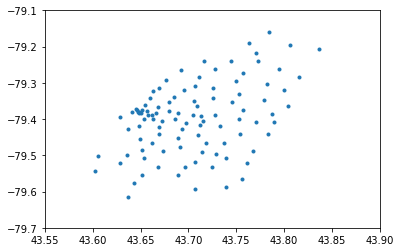

In [82]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.scatter(lats, longs, marker = '.')
plt.xlim(43.55, 43.90)
plt.ylim(-79.7, -79.1)
plt.show()

Applying K-Means Clustering

In [29]:
from sklearn.cluster import KMeans

In [71]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [72]:
lats.shape, longs.shape

((103,), (103,))

In [73]:
X = np.array([lats, longs]).transpose()
X.shape

(103, 2)

In [74]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 2, 0, 2, 3, 1, 0, 2, 2, 0, 3, 1, 2, 2, 2, 0, 3, 1, 2, 2, 0,
       1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2,
       1, 0, 3, 2, 2, 3, 3, 1, 0, 3, 2, 0, 3, 3, 1, 0, 3, 0, 0, 3, 3, 1,
       0, 0, 0, 3, 3, 1, 0, 0, 2, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2,
       3, 3, 1, 2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 3, 3])

In [76]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.74254792, -79.41366641],
       [ 43.76342274, -79.25682511],
       [ 43.66807421, -79.37315645],
       [ 43.68059059, -79.52478493]])

## Part 3

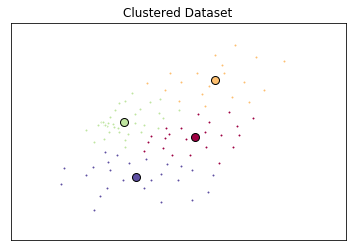

In [84]:
fig = plt.figure(figsize=(6, 4))

colors = cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col,  markeredgecolor = 'k', markersize = 8)

ax.set_title('Clustered Dataset')

plt.xlim(43.55, 43.90)

plt.ylim(-79.7, -79.1)

ax.set_xticks(())

ax.set_yticks(())

plt.show()

In [79]:
df['ClusterLabel'] = 0

for i in range(df.shape[0]):
    df['ClusterLabel'][i] = k_means_labels[i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [80]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude,ClusterLabel
0,M3A,North York,Parkwoods,43.753259,-79.329656,1
1,M4A,North York,Victoria Village,43.725882,-79.315572,1
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,3
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1
7,M3B,North York,Don Mills,43.745906,-79.352188,0
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,2
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2
